# LEAD SCORING FOR NEWKARAK

The society  « Newkarak » is launching a **new type of karaoke worldwide.** 

They are launching a new **disruptive concept** with both online karaoke rooms and physical clubs for karaoke lovers. They only work with **monthly subscription** and aim to become **the Netflix of karaoke.**
From data collected through online surveys on their prospects, **they want Ekimetrics to help them target their online prospects** with the best possible performance.
At your last Eki-event, your CEO understood that you where killing the game in terms of karaoke. Hence he put you in charge of this **lead scoring project**. 

**Are you up to it ?**

![](https://media.giphy.com/media/kKJ8YFi1VVhHFudiz2/giphy.gif)


## Settings and libraries 

In [0]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import os
import time
from tqdm import tqdm_notebook

# visulaisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<script>$('div.cell.selected').next().height(100);</script>"))

If you have an error here (for example ``ModuleNotFoundError: No module named 'seaborn'``) don't forget to install every modules. <br>
For that, create a new cell and type <br>```!pip install seaborn```<br>It should work afterward when you re-run the import cell

Part 1 and 2 are classical Machine Learning Data Processing and Preparation steps, they are here only for necessity but you do not need to go through them in detail. Just run all cells.

## 1. Data extraction and aggregation

## Downloading the data

In [0]:
doc_input = u'C:/Users/epierard/Ekimetrics/Louis CAMUS - 0. Scoring/3. Models/Kaggle/Lead scoring/input/final_data.csv'
table=pd.DataFrame(pd.read_csv(doc_input, sep=";"))

## 2. Data cleansing and preprocessing

### Data exploration (EDA)

In [0]:
table=table.apply(pd.to_numeric, errors='ignore')

In [0]:
def plot_occurence(column):
    plt.figure(figsize=(20,5))
    plt.title(column)
    sns.countplot(table[column])
    plt.show()

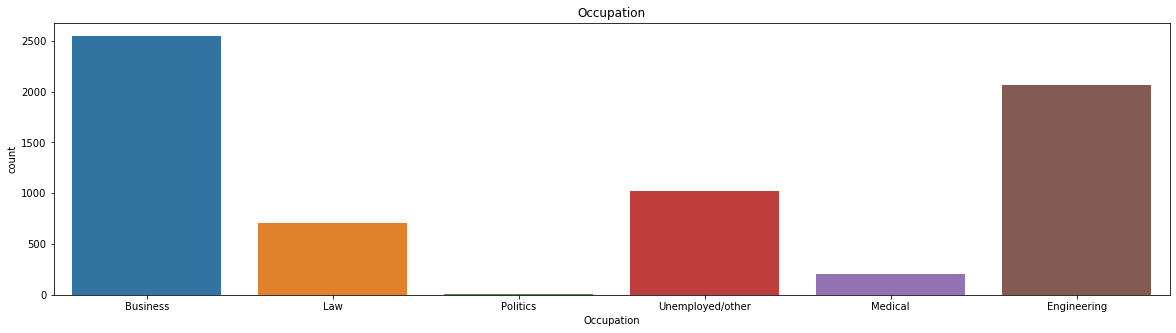

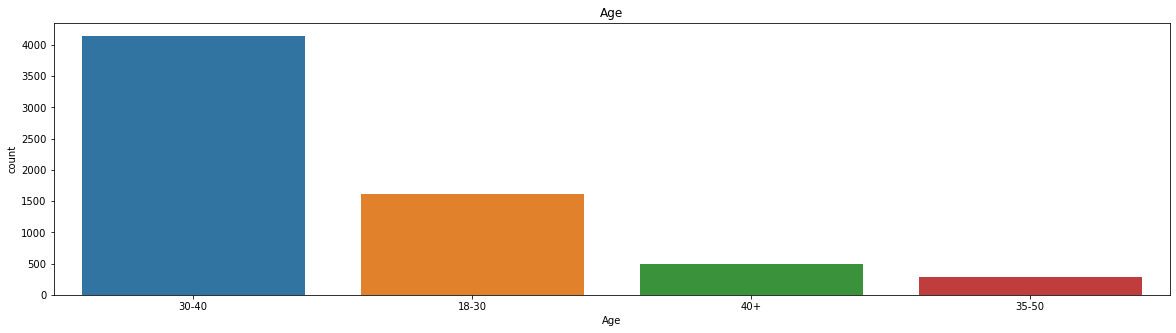

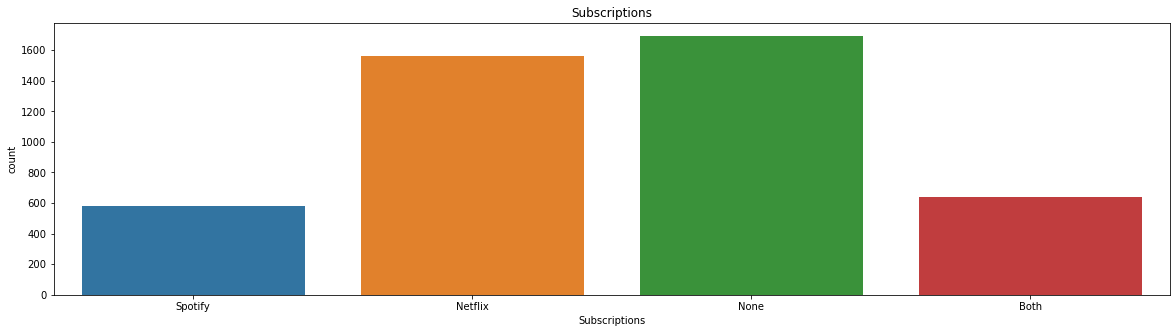

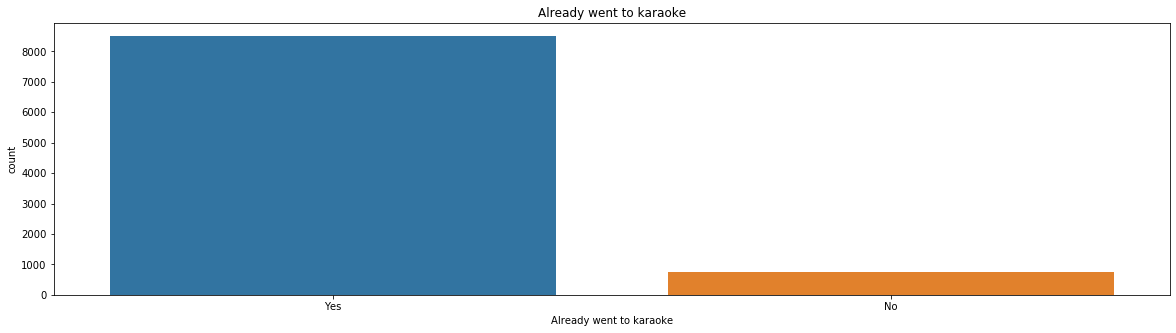

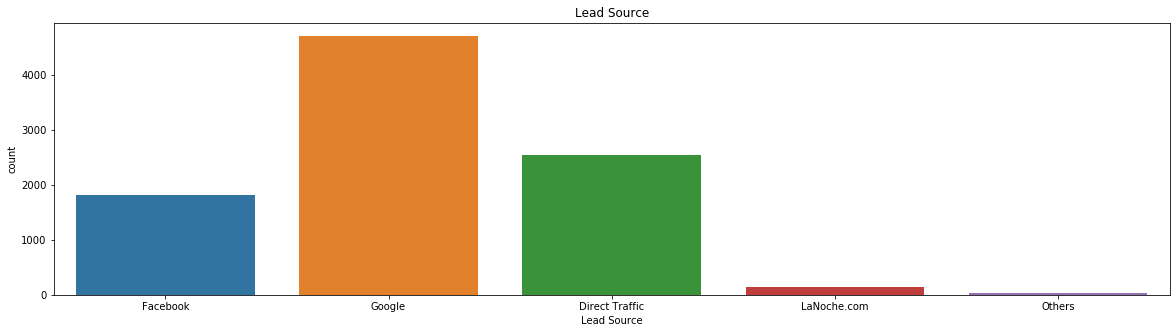

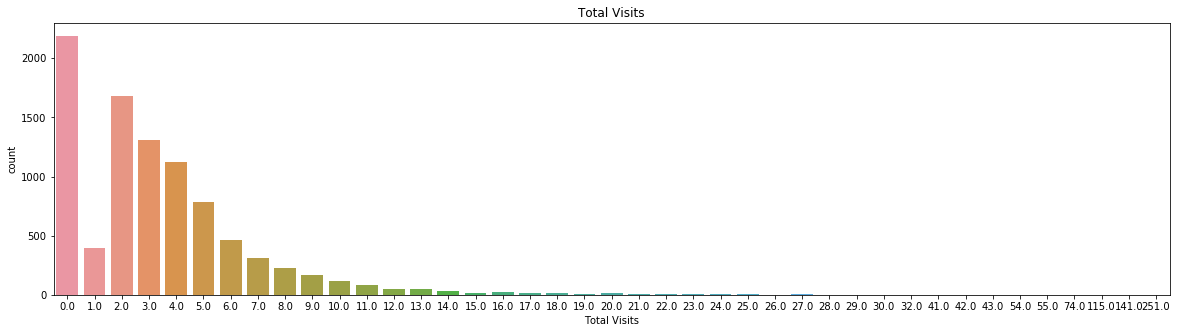

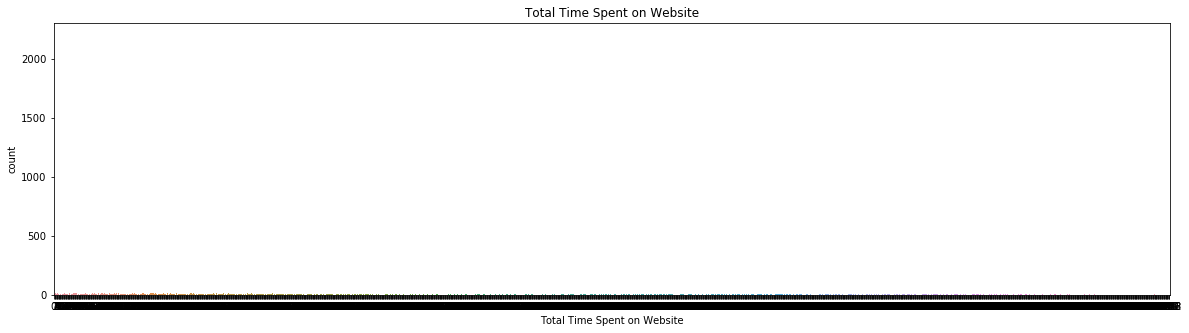

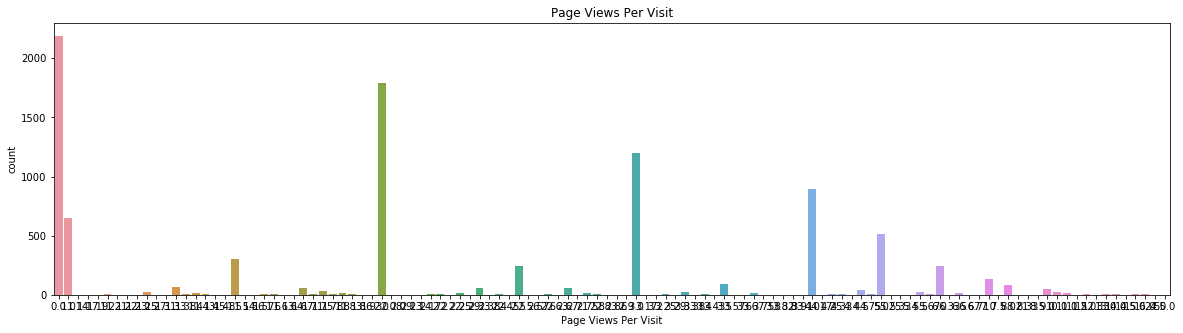

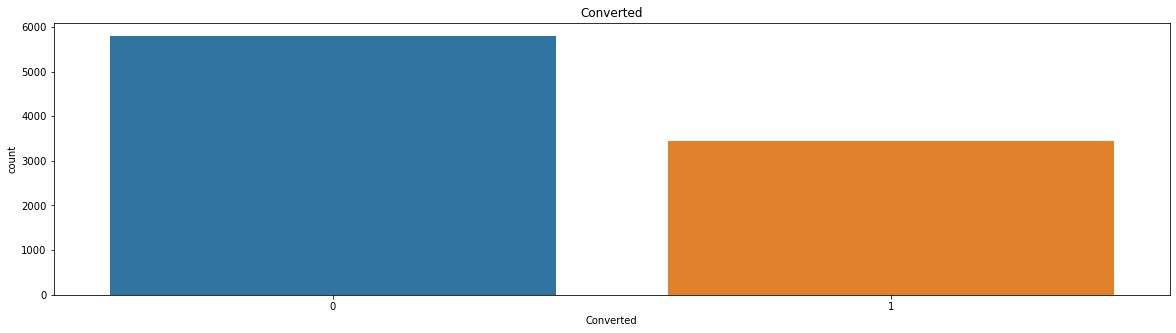

In [0]:
for c in table.columns:
    plot_occurence(c)

### Empty & NaN values

Is there any column with empty (`NaN`/`None`) values?

In [0]:
table.isnull().sum()

Occupation                     2690
Age                            2709
Subscriptions                  4767
Already went to karaoke           0
Lead Source                       0
Total Visits                    137
Total Time Spent on Website       0
Page Views Per Visit            137
Converted                         0
dtype: int64

In [0]:
table=table.fillna(0)

### Define your variables/features

In [0]:
table=table.apply(pd.to_numeric, errors='ignore')
cols=table.columns

In [0]:
cat_cols = [
    'Occupation',
    'Age',
    'Subscriptions',
    'Already went to karaoke',
    'Lead Source'
]

num_cols = [
    'Total Visits', 
    'Total Time Spent on Website',
    'Page Views Per Visit'
]

target_col = 'Converted'

### Preparing and preprocessing data

Based on the type you gave to each column, we are going to preprocess each of them to clean the data.

Here we will :

- Convert to dummies categorical variables
- Do nothing to numerical variables (could be interesting to normalize them)
- Create a simple function to do all those steps automatically

In [0]:
from sklearn.model_selection import train_test_split

def preproc(data,cat_cols,num_cols,target_col,test_size = 0.2):
    
    # Convert categorical variables to dummies (1 and 0)
    data_cat = pd.get_dummies(data[cat_cols])
    
    # Keep the numerical columns
    data_num = data[num_cols]
    
    # Concat the num and cat data
    X = pd.concat([data_num, data_cat], axis=1)
    
    # Prepare target variable
    y = data[target_col]
    
    # Split the dataset in train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test    

In [0]:
X_train, X_test, y_train, y_test = preproc(table,cat_cols,num_cols,target_col,test_size = 0.2)
y = table[target_col]

## 3. Machine Learning


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

### Linear Regression

Logistic Regression can be summarised as a 3 step process : 
- First, it is a linear regression that gives scores
- Then it classifies the scores into categories (often 0 or 1 corresponding to 'yes' or 'no') using a threshold
- The threshold can be changed according to your purpose

In [0]:
# Instantiate model
lr=LogisticRegression()
# Train the model on training data
lr.fit(X_train,y_train)
#predict on test data
y_pred_lr = lr.predict(X_test)

In [0]:
# Visualizing the scores using y_pred_proba_lr
y_pred_proba_lr = lr.predict_proba(X_test)
print(y_pred_proba_lr[:,1].astype('float64').round(2))

[0.39 0.11 0.91 ... 0.1  0.08 0.92]


### Decision Tree

In [0]:
# Instantiate model
dt = DecisionTreeClassifier(random_state = 0)
# Train the model on training data
dt.fit(X_train, y_train)
#predict on test data
y_pred_dt = dt.predict(X_test)

### Random Forest

In [0]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10)
# Train the model on training data
rf.fit(X_train, y_train)
#predict on test data
y_pred_rf = rf.predict(X_test)

### XGBoost

In [0]:
# Instantiate model
xb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
# Train the model on training data
xb.fit(X_train, y_train)
#predict on test data
y_pred_xb = xb.predict(X_test)

## 4. Performance measurement


In [0]:
from sklearn.metrics import accuracy_score

### 4.1. Comparing Models 

In [0]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print("Accuracy of Logistic Regression is " + str(round(metrics.accuracy_score(y_test, y_pred_lr),3)))
print("Accuracy of Decision Tree is " + str(round(metrics.accuracy_score(y_test, y_pred_dt),3)))
print("Accuracy of Random Forest is " + str(round(metrics.accuracy_score(y_test, y_pred_rf),3)))
print("Accuracy of XGBoost is " + str(round(metrics.accuracy_score(y_test, y_pred_xb),3)))

Accuracy of Logistic Regression is 0.824
Accuracy of Decision Tree is 0.804
Accuracy of Random Forest is 0.822
Accuracy of XGBoost is 0.82


### 4.1.2 Confusion Matrix

Every observation in the testing set is represented in exactly one box. For our case, it is a 2x2 matrix because there are 2 response classes (1 or 0 for "Converted" and "Not Converted").

![image.png](attachment:image.png)


For instance, if the target variable is the fact to have diabetes:

**True Positives (TP):** we correctly predicted that they do have diabetes

**True Negatives (TN):** we correctly predicted that they don't have diabetes

**False Positives (FP):** we incorrectly predicted that they do have diabetes (a "Type I error")
Falsely predict positive
Type I error

**False Negatives (FN):** we incorrectly predicted that they don't have diabetes (a "Type II error")
Falsely predict negative
Type II error


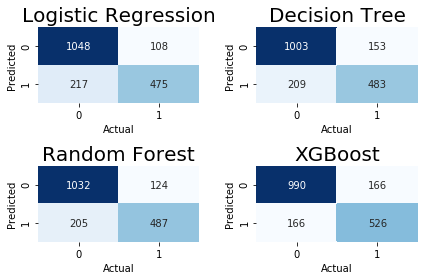

In [0]:
from sklearn.metrics import confusion_matrix
i=1
titles = {1:'Logistic Regression',2:'Decision Tree',3:'Random Forest',4:'XGBoost'}

for y_pred in [y_pred_lr,y_pred_dt,y_pred_rf,y_pred_xb] :
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True,fmt='.0f',cmap='Blues',cbar=False)
    plt.title(titles.get(i,'Not found'), fontdict={'fontsize': 20,'fontweight' : 10})
    i= i+1
    plt.tight_layout()
    plt.xlabel("Actual")
    plt.ylabel("Predicted")

### 4.1.3 Metrics computed from a confusion matrix

**Classification Accuracy:** Overall, how often is the classifier correct?

In [0]:
# (TP + TN) / (TP + TN + FP + FN)
i=1
for y_pred in [y_pred_lr,y_pred_dt,y_pred_rf,y_pred_xb] :
    print(str(titles[i]) + ' : ' + str(round(metrics.accuracy_score(y_test, y_pred),2)))
    i+=1

Logistic Regression : 0.82
Decision Tree : 0.8
Random Forest : 0.82
XGBoost : 0.82


**Classification Error:** Overall, how often is the classifier incorrect?

In [0]:
#classification_error = (FP + FN) / float(TP + TN + FP + FN)
i=1
for y_pred in [y_pred_lr,y_pred_dt,y_pred_rf,y_pred_xb] :
    print(str(titles[i]) + ' : ' + str(round(1 - metrics.accuracy_score(y_test, y_pred),2)))
    i+=1

Logistic Regression : 0.18
Decision Tree : 0.2
Random Forest : 0.18
XGBoost : 0.18


**Sensitivity or Recall:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?

![image.png](attachment:image.png)

In [0]:
i=1
for y_pred in [y_pred_lr,y_pred_dt,y_pred_rf,y_pred_xb] :
    print(str(titles[i]) + ' : ' + str(round(metrics.recall_score(y_test, y_pred),2)))
    i+=1

Logistic Regression : 0.69
Decision Tree : 0.7
Random Forest : 0.7
XGBoost : 0.76


**Precision:** When a positive value is predicted, how often is the prediction correct?
How "precise" is the classifier when predicting positive instances?
![image.png](attachment:image.png)

In [0]:
i = 1
for y_pred in [y_pred_lr,y_pred_dt,y_pred_rf,y_pred_xb] :
    print(str(titles[i]) + ' : ' + str(round(metrics.precision_score(y_test, y_pred),3)))
    i+=1

Logistic Regression : 0.815
Decision Tree : 0.759
Random Forest : 0.797
XGBoost : 0.76


**Specificity:** When the actual value is negative, how often is the prediction correct?
    
Something we want to maximize
How "specific" (or "selective") is the classifier in predicting positive instances?

In [0]:
# specificity = TN / (TN + FP)
i = 1
for y_pred in [y_pred_lr,y_pred_dt,y_pred_rf,y_pred_xb] :
    cm = confusion_matrix(y_test, y_pred)
    specificity = cm[1,1] / (cm[1,1]+cm[0,1])
    print(str(titles[i]) + ' : ' + str(round(specificity,3)))
    i+=1

Logistic Regression : 0.815
Decision Tree : 0.759
Random Forest : 0.797
XGBoost : 0.76


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [0]:
#false_positive_rate = FP / float(TN + FP)
i = 1
for y_pred in [y_pred_lr,y_pred_dt,y_pred_rf,y_pred_xb] :
    cm = confusion_matrix(y_test, y_pred)
    specificity = cm[1,1] / (cm[1,1]+cm[0,1])
    print(str(titles[i]) + ' : ' + str(round(1-specificity,2)))
    i+=1

Logistic Regression : 0.19
Decision Tree : 0.24
Random Forest : 0.2
XGBoost : 0.24


**Conclusion:**

**Which metrics should you focus on?**

Choice of metric depends on your **business objective**
- Identify if FP or FN is more important to reduce
- Choose metric with relevant variable (FP or FN in the equation)

For example : 
- If you want to filter spam e-mails (positive class 1 will represent spams), optimize for precision or specificity. Because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)


- Fraudulent transaction detector (positive class is "fraud"): optimize for sensitivity. Because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

### 4.2 Adjusting the threshold

#### 4.2.1 Receiver operating characteristic (ROC) and Area Under ROC Curve (AUC)

The ROC curve is a graphical plot which illustrates the **performance** of a binary classifier system as its **discrimination threshold varies**. 

It is created by **plotting sensitivity/recall** (the fraction of true positives out of the positives) vs. **false positive rate or 1-Specificity** (the fraction of false positives out of the negatives) **at various threshold settings.** 

![image.png](attachment:image.png)

**Area under ROC curve is often used as a measure of quality of the classification models.**
A random classifier has an area under the curve of 0.5, while AUC for a perfect classifier is equal to 1. 

An area under the ROC curve of 0.8, for example, means that a randomly selected case from the group with the target equals 1 has a score larger than that for a randomly chosen case from the group with the target equals 0 in 80% of the time.

![image.png](attachment:image.png)

In [0]:
from sklearn.metrics import roc_curve, auc

# First , we need to retrieve scores before the threshold-based classification into positive and negative classes 
y_pred_proba_lr = lr.predict_proba(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)
y_pred_proba_xb = xb.predict_proba(X_test)

In [0]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_pred_proba_lr[:, 1])
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_pred_proba_dt[:, 1])
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_pred_proba_rf[:, 1])
fpr_xb, tpr_xb, thresholds_xb = metrics.roc_curve(y_test, y_pred_proba_xb[:, 1])

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xb = auc(fpr_xb, tpr_xb)

plt.plot(fpr_lr, tpr_lr, color='darkorange',
         lw=lw,label='Logistic Reg. (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, color='violet',
         lw=lw,label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='green',
         lw=lw,label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xb, tpr_xb, color='red',
         lw=lw,label='XGBoost(AUC = %0.2f)' % roc_auc_xb)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',label = 'Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='best')
plt.grid(True)


NameError: name 'lw' is not defined

Here, globally the worst classifier is the decision tree, while the best ones are Logistic Regression and XGBoost.

You can use AUC in complement with recall and precision metrics that are the most appropriate for your business question to choose between models

#### 4.2.2 Precision Recall Curve to identify best threshold for a specific model

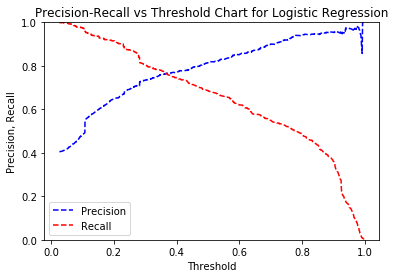

In [0]:
# Let's compare thresholds on Logistic Regression and XGBoost
from sklearn.metrics import precision_recall_curve

precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred_proba_lr[:, 1]) 

pr_auc = metrics.auc(recall_lr, precision_lr)

plt.title("Precision-Recall vs Threshold Chart for Logistic Regression")
plt.plot(thresholds_lr, precision_lr[: -1], "b--", label="Precision")
plt.plot(thresholds_lr, recall_lr[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

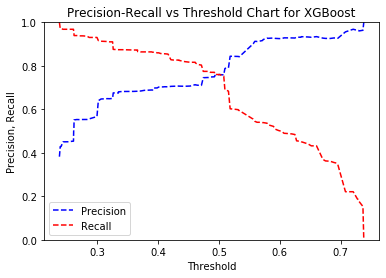

In [0]:
# Let's compare thresholds on Logistic Regression and XGBoost
from sklearn.metrics import precision_recall_curve

precision_xb, recall_xb, thresholds_xb = precision_recall_curve(y_test, y_pred_proba_xb[:, 1]) 

pr_auc = metrics.auc(recall_xb, precision_xb)

plt.title("Precision-Recall vs Threshold Chart for XGBoost")
plt.plot(thresholds_xb, precision_xb[: -1], "b--", label="Precision")
plt.plot(thresholds_xb, recall_xb[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

** Conclusion **

The threshold must be chosen according to the model you choose and the business objective.

**NB :** the analysis of the **importance of the variables** in the modelisation is also important to take into account for **interpretability** purposes, for scoring problems as well as any Machine Learning problem.